In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0

In [12]:
import matplotlib.pyplot as plt
import numpy as np

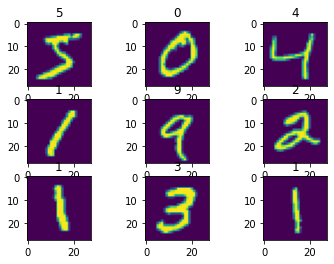

In [14]:

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [15]:
base_model = ResNet50(weights = "imagenet", include_top=False)
base_model.trainable = False

In [19]:
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout

In [24]:
model = Sequential([
    Conv2D(6, (5,5), activation = "relu", input_shape = (28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, (5,5), activation = "relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(120, activation = "relu"),
    Dropout(0.5),
    Dense(84, activation = "relu"),
    Dense(10, activation="softmax")
])
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [27]:
history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9602 - loss: 0.1283 - val_accuracy: 0.9808 - val_loss: 0.0656
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9616 - loss: 0.1206 - val_accuracy: 0.9777 - val_loss: 0.0728
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9643 - loss: 0.1144 - val_accuracy: 0.9786 - val_loss: 0.0715
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9675 - loss: 0.1048 - val_accuracy: 0.9811 - val_loss: 0.0674
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9670 - loss: 0.1081 - val_accuracy: 0.9796 - val_loss: 0.0666
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9688 - loss: 0.1003 - val_accuracy: 0.9798 - val_loss: 0.0677
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9669 - loss: 0.1051 - val_accuracy: 0.9810 - val_loss: 0.0647
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9716 - loss: 0.0922 - 

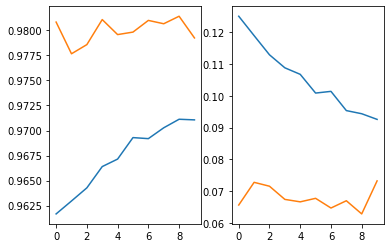

In [28]:
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [29]:
loss, acc = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8568 - loss: 90.0926


In [30]:
print("Accuracy", acc)
print("loss", loss)

Accuracy 0.8636999726295471
loss 84.41714477539062


In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,280 (520.63 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,854 (347.09 KB)

In [ ]:
from tensorflow.keras.applications import VGG16
base_model2 = VGG16(weights = "imagenet", include_top=False)
base_model2.trainable = False

In [23]:
model2 = Sequential([
    base_model2,
    GlobalAveragePooling2D(),
    Dense(1, activation="sigmoid")
])
model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [24]:
history2 = model2.fit(train_data, epochs = 10, validation_data= test_data)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.5443 - loss: 0.7139 - val_accuracy: 0.7512 - val_loss: 0.6430
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.7815 - loss: 0.6277 - val_accuracy: 0.8683 - val_loss: 0.5888
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.8875 - loss: 0.5720 - val_accuracy: 0.8927 - val_loss: 0.5400
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9189 - loss: 0.5204 - val_accuracy: 0.9024 - val_loss: 0.4991
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9326 - loss: 0.4776 - val_accuracy: 0.9073 - val_loss: 0.4653
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.9354 - loss: 0.4431 - val_accuracy: 0.9073 - val_loss: 0.4364
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.9283 - loss: 0.4147 - val_accuracy: 0.9122 - val_loss: 0.4110
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.9425 - loss: 0.3871 - val_accuracy: 0.9171 - val_loss:

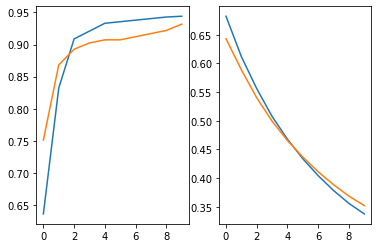

In [25]:
plt.subplot(1,2,1)
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])

plt.subplot(1,2,2)
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])